# VERY simple demographic trends

In [1]:
%matplotlib inline
import sodapy
import matplotlib.pyplot as pp

data_url = 'data.cityofchicago.org'
divvy_data = 'fg6s-gzvg'

## Percentage of rides taken by female subscribers

In [2]:
data = sodapy.Socrata(data_url, None)

print 'YEAR Total Rides %Female (subscriber)'
for y in [2013, 2014, 2015, 2016]:
    where = 'stop_time between \'{0:d}-01-01T00:00:00\''.format(y) +\
        ' and \'{0:d}-12-31T11:59:00\''.format(y)
    num_trips = data.get(divvy_data, select='gender, count(trip_id)',
                         where=where,
                         group='gender')
    for i, r in enumerate(num_trips):
        if 'gender' in r:
            if r['gender'] == 'Male':
                i_male = i
            elif r['gender'] == 'Female':
                i_female = i

    num_female = int(num_trips[i_female]['count_trip_id'])
    num_male = int(num_trips[i_male]['count_trip_id'])

    num_total = num_female + num_male
    p_female = 100.0*float(num_female)/num_total

    print '{0:d} {1:11d}   {2:2.1f}'.format(y, num_total, p_female)

data.close()

YEAR Total Rides %Female (subscriber)
2013      402767   21.0
2014     1662530   24.5
2015     2252162   25.2
2016     1146768   24.4


## Histogram of total rides per bicycle

Retrieved 5658 records


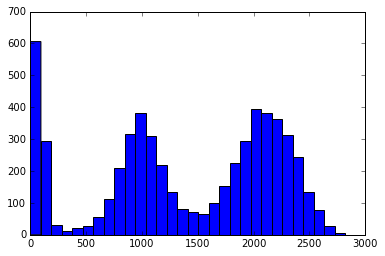

In [8]:
data = sodapy.Socrata(data_url, None)

num_trips = data.get(divvy_data, select='bike_id, count(trip_id)',
                     group='bike_id', limit=6000)
print 'Retrieved {0:d} records'.format(len(trips_per_bike))

trips_per_bike = [int(n['count_trip_id']) for n in num_trips]
pp.hist(trips_per_bike, bins=30)

data.close()